## 学习理解如何用最小二乘法的矩阵公式得到线性回归的解，并使用numpy库来实现该算法。

最小二乘法（method of least squares)是回归分析中常用的标准方法，主要用于寻求overdetermined system系统的解。所谓overdetermined system，即系统中的等式比未知量要多。最小二乘（least squares）的核心思想是使得误差的平方和最小。

对于如下一个overdetermined system

$\sum_{j=1}^nX_{ij}\beta_{j}=y_{i},(i=1,2,...,m)$, 其中m > n

最小二乘法的目的是求得向量$\beta$使得目标函数$S(\beta)$的值最小，其中

$S(\beta)=\sum_{i=1}^m | y_{i} - \sum_{j=1}^nX_{ij}\beta_{j} | ^{2}=||y-X\beta||^{2}$,

对上面这个公式求解可得到$\beta$的解为：

$\beta = (X^{T}X)^{-1}X^{T}y$

目标函数最小值的求解方法有很多种，比如用微积分中的梯度法，或者线性代数的方法，不过利用这个公式并借助numpy库就可以实现一个利用最小二乘法求线性回归的解的函数。

In [4]:
import numpy as np
import statsmodels.api as sm

In [18]:
def least_sqares(y,X):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

借用statsmodels文档中的示例代码测试一下

In [19]:
#构造测试数据
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)


X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [20]:
#使用自定义函数求beta
beta = least_sqares(y,X);beta

array([  1.20643475,  -0.0825874 ,  10.021948  ])

In [21]:
#使用statsmodels模块求beta
model = sm.OLS(y,X)
result = model.fit()
result.params

array([  1.20643475,  -0.0825874 ,  10.021948  ])

## 使用pandas库中的函数下载上证综指和任一成份股票数据，计算日收益率，对这两组数据建立回归模型，将上证综指的收益率作为解释变量，说明这个模型的用处。

In [596]:
from pandas_datareader import data
import pandas as pd
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
import matplotlib.pyplot as plt
%matplotlib inline

In [845]:
begin = datetime.datetime(2015,10,21)
end = datetime.datetime(2016,10,21)
gzmt = data.DataReader('600519.SS','yahoo',begin,end)#贵州茅台
sh = data.DataReader('000001.SS','yahoo',begin,end)#上证指数

In [97]:
len(gzmt),len(gzmt.dropna())

(263, 263)

In [98]:
len(sh),len(sh.dropna())

(235, 235)

In [99]:
# 计算上证指数收益率
close_price_sh = sh['Close']
profits_sh = close_price_sh.diff()[1:].div(close_price_sh[:-1].values)

# 计算贵州茅台收益率
close_price_gzmt = gzmt['Close']
profits_gzmt = close_price_gzmt.diff()[1:].div(close_price_gzmt[:-1].values)

In [100]:
len(profits_sh), len(profits_sh.dropna())

(234, 234)

In [101]:
len(profits_gzmt), len(profits_gzmt.dropna())

(262, 262)

比较上证指数和贵州茅台的收益率数据发现，两者长度不一致，必须对数据进行处理使二者长度一致才能进行下一步操作。

In [102]:
profits = pd.DataFrame(profits_gzmt,columns=['profits_gzmt']).join(pd.DataFrame(profits_sh,columns=['profits_sh']))
profits = profits.dropna()

In [103]:
profit_results = smf.ols('profits_gzmt ~ profits_sh',profits).fit()
print profit_results.summary()

                            OLS Regression Results                            
Dep. Variable:           profits_gzmt   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sat, 22 Oct 2016   Prob (F-statistic):           2.20e-20
Time:                        08:30:58   Log-Likelihood:                 660.41
No. Observations:                 234   AIC:                            -1317.
Df Residuals:                     232   BIC:                            -1310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0018      0.001      1.902      0.0

从结果来看，profits_sh的coef值为0.6031，说明上证指数的收益率还是对贵州茅台的收益率有相当大的影响，不过R-squared值为0.309，说明该模型仅仅能够解释30%左右茅台收益率结果。

下面再找两个股票来对比一下，一个是深证市场的万科，一个是创业板的同花顺。

In [829]:
#获取同花顺数据
ths = data.DataReader('300033.SZ','yahoo',begin,end)
# 计算同花顺收益率
close_price_ths = ths['Close']
profits_ths = close_price_ths.diff()[1:].div(close_price_ths[:-1].values)
#构造dataframe，并清除无效数据
profits = pd.DataFrame(profits_ths,columns=['profits_ths']).join(pd.DataFrame(profits_sh,columns=['profits_sh']))
profits = profits.dropna()

In [830]:
profit_results = smf.ols('profits_ths ~ profits_sh',profits).fit()
print profit_results.summary()

                            OLS Regression Results                            
Dep. Variable:            profits_ths   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     179.0
Date:                Sun, 23 Oct 2016   Prob (F-statistic):           1.22e-30
Time:                        15:18:00   Log-Likelihood:                 493.98
No. Observations:                 234   AIC:                            -984.0
Df Residuals:                     232   BIC:                            -977.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0006      0.002      0.322      0.7

从模型拟合的结果来看，同花顺收益率为上证指数的1.6倍，这也符合创业板股票的特征，R-squared值为0.436，说明该模型可以解释40%左右同花顺的收益率情况。可实际上同花顺不不属于上证指数成份股，这说明上面这个模型的结果仅仅具有一定的参考价值，必须参照其它模型的结果才能有更可靠的解释力度。

In [833]:
#获取万科数据
wk = data.DataReader('000002.SZ','yahoo',begin,end)
# 计算万科收益率
close_price_wk = wk['Close']
profits_wk = close_price_wk.diff()[1:].div(close_price_wk[:-1].values)
#构造dataframe，并清除无效数据
profits = pd.DataFrame(profits_wk,columns=['profits_wk']).join(pd.DataFrame(profits_sh,columns=['profits_sh']))
profits = profits.dropna()

In [834]:
profit_results = smf.ols('profits_wk ~ profits_sh',profits).fit()
print profit_results.summary()

                            OLS Regression Results                            
Dep. Variable:             profits_wk   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.508
Date:                Sun, 23 Oct 2016   Prob (F-statistic):             0.0623
Time:                        15:21:16   Log-Likelihood:                 506.23
No. Observations:                 234   AIC:                            -1008.
Df Residuals:                     232   BIC:                            -1002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0033      0.002      1.806      0.0

从模型输出结果来看，上证指数对万科的收益率影响比较小，不过pvalues值为0.062，处于临界位置，R-squared为0.015，也说明了该模型仅仅能够解释万科2%左右的收益率情况。这倒是跟实际情况比较温和。

下面换用深圳指数再用上面的模型来模拟一下。

**本来打算用深圳市场数据验证一下，可是yahoo finance似乎出问题了，读取深证成指的数据时总是报错。**

In [849]:
#获取深圳市场数据
#shen = data.DataReader('399001.SZ','yahoo',begin,end)
# 计算深证指数收益率
#close_price_shen = shen['Close']
#profits_shen = close_price_shen.diff()[1:].div(close_price_shen[:-1].values)
#使用深圳市场数据重新构造dataframe，并清除无效数据
#profits = pd.DataFrame(profits_wk,columns=['profits_wk']).join(pd.DataFrame(profits_shen,columns=['profits_shen']))
#profits = profits.dropna()

## 在kaggle网站上找到titanic数据，并使用logistic回归来建模，研究分析每个因素对应生存的重要性。

In [671]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [672]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [673]:
# 清除多余数据及无效数据
train = train.drop(['Ticket','Cabin'],axis=1)
train = train.dropna()

In [674]:
len(train)

712

绘制一些图形来查看数据

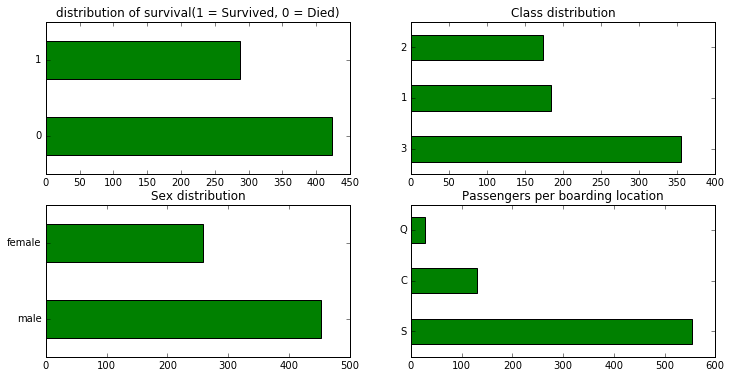

In [675]:
fig,ax = plt.subplots(2,2,figsize=(12,6))

train.Survived.value_counts().plot(kind='barh',color='green',ax = ax[0][0])
ax[0][0].set_title("distribution of survival(1 = Survived, 0 = Died)")



train.Pclass.value_counts().plot(kind='barh',color='green',ax = ax[0][1])
ax[0][1].set_title("Class distribution")

train.Sex.value_counts().plot(kind='barh',color='green',ax = ax[1][0])
ax[1][0].set_title("Sex distribution");

train.Embarked.value_counts().plot(kind='barh',color='green',ax = ax[1][1])
ax[1][1].set_title("Passengers per boarding location");



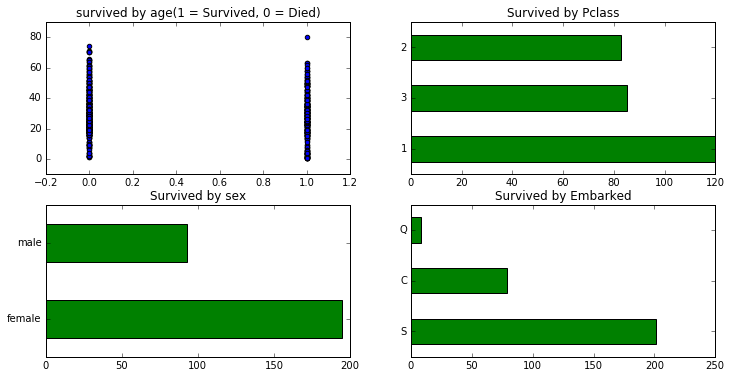

In [676]:
fig,ax = plt.subplots(2,2,figsize=(12,6))


ax[0][0].scatter(train.Survived, train.Age)
ax[0][0].set_title("survived by age(1 = Survived, 0 = Died)")

train[train.Survived == 1].Pclass.value_counts().plot(kind='barh',color='green',ax = ax[0][1])
ax[0][1].set_title("Survived by Pclass");

train[train.Survived == 1].Sex.value_counts().plot(kind='barh',color='green',ax = ax[1][0])
ax[1][0].set_title("Survived by sex");

train[train.Survived == 1].Embarked.value_counts().plot(kind='barh',color='green',ax = ax[1][1])
ax[1][1].set_title("Survived by Embarked");

从上图可以大致猜测到：幸存人数中年龄区别不太明显，头等舱幸存人数多，女性幸存人数多，S地点登船的人群幸存人数多。

下面使用logistic regression来研究不同参数对幸存率的影响。

In [681]:
model_pclass = smf.logit("Survived ~ C(Pclass)",data = train)
result_pclass = model_pclass.fit()

Optimization terminated successfully.
         Current function value: 0.609629
         Iterations 5


In [682]:
print result_pclass.summary()

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Oct 2016   Pseudo R-squ.:                 0.09657
Time:                        12:57:16   Log-Likelihood:                -434.06
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 7.088e-21
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.6286      0.155      4.061      0.000         0.325     0.932
C(Pclass)[T.2]    -0.7096      0.217     -3.269      0.001        -1.135    -0.284
C(Pclass)[T.3]    -1.7844      0.199

In [686]:
model_sex = smf.logit("Survived ~ Sex", data = train)
result_sex = model_sex.fit()

Optimization terminated successfully.
         Current function value: 0.526383
         Iterations 5


In [687]:
print result_sex.summary()

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            1
Date:                Sun, 23 Oct 2016   Pseudo R-squ.:                  0.2199
Time:                        13:07:23   Log-Likelihood:                -374.78
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 7.029e-48
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       1.1141      0.144      7.734      0.000         0.832     1.396
Sex[T.male]    -2.4676      0.185    -13.327      0.000        -2.831    -2.105


In [688]:
model_age = smf.logit("Survived ~ Age", data = train)
result_age = model_age.fit()

Optimization terminated successfully.
         Current function value: 0.671367
         Iterations 4


In [689]:
print result_age.summary()

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            1
Date:                Sun, 23 Oct 2016   Pseudo R-squ.:                0.005076
Time:                        13:07:49   Log-Likelihood:                -478.01
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                   0.02721
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0412      0.174     -0.237      0.813        -0.382     0.300
Age           -0.0118      0.005     -2.192      0.028        -0.022    -0.001


In [692]:
model_sibsp = smf.logit("Survived ~ SibSp", data = train)
result_sibsp = model_sibsp.fit()

Optimization terminated successfully.
         Current function value: 0.674671
         Iterations 4


In [693]:
print result_sibsp.summary()

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            1
Date:                Sun, 23 Oct 2016   Pseudo R-squ.:               0.0001795
Time:                        13:11:44   Log-Likelihood:                -480.37
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                    0.6779
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.3692      0.087     -4.235      0.000        -0.540    -0.198
SibSp         -0.0343      0.083     -0.414      0.679        -0.197     0.128


In [695]:
model_embarked = smf.logit("Survived ~ Embarked", data = train)
result_embarked = model_embarked.fit()

Optimization terminated successfully.
         Current function value: 0.655482
         Iterations 5


In [696]:
print result_embarked.summary()

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Oct 2016   Pseudo R-squ.:                 0.02862
Time:                        13:12:49   Log-Likelihood:                -466.70
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 1.069e-06
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.4376      0.180      2.436      0.015         0.086     0.790
Embarked[T.Q]    -1.3539      0.455     -2.974      0.003        -2.246    -0.462
Embarked[T.S]    -1.0008      0.200     

In [698]:
model_parch = smf.logit("Survived ~ Parch", data = train)
result_parch = model_parch.fit()

Optimization terminated successfully.
         Current function value: 0.670318
         Iterations 4


In [699]:
print result_parch.summary()

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            1
Date:                Sun, 23 Oct 2016   Pseudo R-squ.:                0.006630
Time:                        13:14:39   Log-Likelihood:                -477.27
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                   0.01160
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.4860      0.086     -5.620      0.000        -0.655    -0.316
Parch          0.2246      0.090      2.499      0.012         0.048     0.401


In [700]:
model_fare = smf.logit("Survived ~ Fare", data = train)
result_fare = model_fare.fit()

Optimization terminated successfully.
         Current function value: 0.631432
         Iterations 6


In [701]:
print result_fare.summary()

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            1
Date:                Sun, 23 Oct 2016   Pseudo R-squ.:                 0.06426
Time:                        13:16:48   Log-Likelihood:                -449.58
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 3.909e-15
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.8945      0.107     -8.330      0.000        -1.105    -0.684
Fare           0.0157      0.002      6.323      0.000         0.011     0.021


In [786]:
type(result_fare.prsquared)

numpy.float64

In [788]:
#使用上面所有模型结果中的coef、prsquare、pvalued构造一个dataframe
result_pclass_pd = pd.DataFrame(data = {'coef':result_pclass.params[1:],'pvalue':result_pclass.pvalues[1:],'prsquare':result_pclass.prsquared})
result_sex_pd = pd.DataFrame(data = {'coef':result_sex.params[1:],'pvalue':result_sex.pvalues[1:],'prsquare':result_sex.prsquared})
result_age_pd = pd.DataFrame(data = {'coef':result_age.params[1:],'pvalue':result_age.pvalues[1:],'prsquare':result_age.prsquared})
result_sibsp_pd = pd.DataFrame(data = {'coef':result_sibsp.params[1:],'pvalue':result_sibsp.pvalues[1:],'prsquare':result_sibsp.prsquared})
result_parch_pd = pd.DataFrame(data = {'coef':result_parch.params[1:],'pvalue':result_parch.pvalues[1:],'prsquare':result_parch.prsquared})
result_embarked_pd = pd.DataFrame(data = {'coef':result_embarked.params[1:],'pvalue':result_embarked.pvalues[1:],'prsquare':result_embarked.prsquared})
result_fare_pd = pd.DataFrame(data = {'coef':result_fare.params[1:],'pvalue':result_fare.pvalues[1:],'prsquare':result_fare.prsquared})

result_all = pd.concat([result_pclass_pd,result_sex_pd,result_age_pd,result_sibsp_pd,
          result_parch_pd,result_embarked_pd,result_fare_pd])
print result_all

                    coef  prsquare        pvalue
C(Pclass)[T.2] -0.709578  0.096567  1.079475e-03
C(Pclass)[T.3] -1.784379  0.096567  2.551729e-19
Sex[T.male]    -2.467621  0.219932  1.610935e-40
Age            -0.011757  0.005076  2.837387e-02
SibSp          -0.034296  0.000180  6.788475e-01
Parch           0.224583  0.006630  1.246924e-02
Embarked[T.Q]  -1.353913  0.028616  2.940391e-03
Embarked[T.S]  -1.000785  0.028616  5.753849e-07
Fare            0.015738  0.064257  2.569047e-10


结果分析：

1. 从Pseudo R-squ值来看，可以很明显的看到Sex指标对于幸存率影响最大，其次是Pclass,影响最小的是SibSp

2. 从coef来看，sex指标影响也比较大，T.male值为负，说明性别为男会明显降低幸存率。其次就是三等舱和地点Q登船的人幸存率比较低。Fare的coef值为正，说明票价越高幸存率越高，这跟Pclass指标相吻合。Parch值为正，说明有父母或子女同行的幸存概率高。

3. SibSp指标的pvalue值太高，说明其统计显著性（statistic significance)不明显，其次，Age指标的pvalue值也不低，处于临界位置。

综上分析，Sex指标对于幸存率影响最大，其次是Pclass。

根据上面分析结果，下面构造多个变量的模型来观察一下。

In [795]:
#使用全部影响因子
model = smf.logit("Survived ~ C(Pclass) + Sex + SibSp + Age + Embarked + Parch + Fare", data = train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.444060
         Iterations 6


In [794]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            9
Date:                Sun, 23 Oct 2016   Pseudo R-squ.:                  0.3419
Time:                        14:30:30   Log-Likelihood:                -316.17
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 2.249e-65
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          4.4329      0.536      8.271      0.000         3.383     5.483
C(Pclass)[T.2]    -1.1896      0.329     -3.614      0.000        -1.835    -0.544
C(Pclass)[T.3]    -2.3952      0.343

从Pseudo R-squ值来看，似乎比单变量的模型的解释力度更强，重要影响因子依然是Pclass和Sex，不过模型中Embarked、Parch和Fare的统计显著性不强。

In [796]:
#仅仅使用Pclass和Sex
model = smf.logit("Survived ~ C(Pclass) + Sex", data = train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.471951
         Iterations 6


In [797]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            3
Date:                Sun, 23 Oct 2016   Pseudo R-squ.:                  0.3006
Time:                        14:48:33   Log-Likelihood:                -336.03
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 2.582e-62
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          2.3237      0.239      9.714      0.000         1.855     2.793
C(Pclass)[T.2]    -0.9195      0.258     -3.561      0.000        -1.426    -0.413
C(Pclass)[T.3]    -1.9674      0.238

减少影响因子，Pseudo R-squ值减小。

In [814]:
#使用影响较大的因
model = smf.logit("Survived ~ C(Pclass) + Sex + SibSp + Age", data = train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.446657
         Iterations 6


In [815]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      706
Method:                           MLE   Df Model:                            5
Date:                Sun, 23 Oct 2016   Pseudo R-squ.:                  0.3381
Time:                        14:54:33   Log-Likelihood:                -318.02
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 4.498e-68
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          4.3254      0.451      9.597      0.000         3.442     5.209
C(Pclass)[T.2]    -1.4063      0.285     -4.937      0.000        -1.965    -0.848
C(Pclass)[T.3]    -2.6450      0.286

试了不同的影响因素组合，发现仅仅使用Sex和Pclass两个因素的时候Pseudo R-squ为0.3006，使用全部影响因素，Pseudo R-squ值最大，为0.3419，其它组合基本介于其中，这再次说明了影响幸存率的主要影响因素为性别（Sex）和仓位等级（Pclass)。

In [816]:
#使用全部影响因子
model = smf.logit("Survived ~ SibSp + Age + Embarked + Parch + Fare", data = train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.610124
         Iterations 6


In [817]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      705
Method:                           MLE   Df Model:                            6
Date:                Sun, 23 Oct 2016   Pseudo R-squ.:                 0.09583
Time:                        15:00:45   Log-Likelihood:                -434.41
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 1.116e-17
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.3965      0.286      1.385      0.166        -0.164     0.957
Embarked[T.Q]    -0.7855      0.472     -1.663      0.096        -1.711     0.140
Embarked[T.S]    -0.6049      0.219     

去除影响最大的两个因素，Pseudo R-squ为0.09583，模型的解释力度大大下降。

## 搜集某个城市过去1个月的PM2.5小时级数据，根据时间序列预测方法，来预测未来三天的PM2.5情况。

In [523]:
#生成日期列表，读取2016年8月份和9月份的数据
start = datetime.date(2016,8,1)
interval = datetime.timedelta(days=1)
datelist = []
datelist.append(start.strftime("%Y%m%d"))
for i in range(60):
    newday = start + interval
    start = newday
    datelist.append(start.strftime("%Y%m%d"))

In [524]:
#生成文件路径列表
filepath = './quanguo_20160101-20161015/china_cities_20160801.csv'
filepath_all = [filepath[:-12] + d + '.csv' for d in datelist]

In [525]:
#读取、筛选pm2.5数据文件，然后将其合并到一个DataFrame中
pm25_list = []
for f in filepath_all:
    pm25_all = pd.read_csv(f)
    pm25_day = pm25_all[pm25_all['type'] == 'PM2.5']
    pm25_list.append(pm25_day)
pm25 = pd.concat(pm25_list)

In [526]:
#修改日期列的数据类型
pm25['Date'] = pm25['date'].astype(str) + ':' + pm25['hour'].astype(str)
#pm25_aug['Date'] = pm25['Date'].apply(lambda x: pd.to_datetime(x,format="%Y%m%d:%H"))
pm25['Date'] = pd.to_datetime(pm25['Date'],format="%Y%m%d:%H")#这种方法比上面更快
pm25 = pm25.set_index('Date')
pm25 = pm25.iloc[:,3:] # 删除无用的列

In [527]:
pm25.head()

,北京,天津,石家庄,唐山,秦皇岛,邯郸,保定,张家口,承德,廊坊,...,五家渠,克州,普洱,襄阳,葫芦岛,河源,揭阳,辽阳,朝阳,丹东
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-01 00:00:00,59.0,38.0,42.0,26.0,20.0,56.0,118.0,55.0,28.0,76.0,...,21.0,16.0,22.0,36.0,25.0,43.0,54.0,43.0,27.0,20.0
2016-08-01 01:00:00,58.0,42.0,34.0,27.0,25.0,50.0,129.0,56.0,28.0,70.0,...,29.0,9.0,21.0,35.0,29.0,38.0,52.0,38.0,23.0,19.0
2016-08-01 02:00:00,56.0,44.0,34.0,40.0,27.0,46.0,125.0,72.0,28.0,79.0,...,27.0,9.0,20.0,39.0,40.0,35.0,59.0,33.0,17.0,18.0
2016-08-01 03:00:00,57.0,50.0,36.0,30.0,33.0,59.0,113.0,60.0,29.0,78.0,...,29.0,12.0,13.0,43.0,49.0,36.0,64.0,31.0,15.0,20.0
2016-08-01 04:00:00,59.0,55.0,33.0,33.0,30.0,54.0,111.0,60.0,30.0,67.0,...,29.0,15.0,12.0,37.0,44.0,37.0,71.0,31.0,16.0,17.0


In [528]:
pm25.tail()

,北京,天津,石家庄,唐山,秦皇岛,邯郸,保定,张家口,承德,廊坊,...,五家渠,克州,普洱,襄阳,葫芦岛,河源,揭阳,辽阳,朝阳,丹东
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-30 19:00:00,119.0,56.0,117.0,77.0,89.0,22.0,106.0,49.0,40.0,68.0,...,7.0,60.0,14.0,18.0,66.0,26.0,24.0,76.0,14.0,45.0
2016-09-30 20:00:00,126.0,58.0,103.0,77.0,102.0,31.0,127.0,56.0,46.0,75.0,...,9.0,66.0,16.0,21.0,89.0,25.0,27.0,78.0,15.0,56.0
2016-09-30 21:00:00,128.0,59.0,124.0,67.0,80.0,37.0,131.0,53.0,47.0,82.0,...,18.0,80.0,25.0,24.0,92.0,29.0,29.0,70.0,14.0,50.0
2016-09-30 22:00:00,129.0,60.0,125.0,73.0,71.0,42.0,157.0,56.0,50.0,83.0,...,45.0,74.0,24.0,22.0,75.0,30.0,28.0,65.0,13.0,72.0
2016-09-30 23:00:00,131.0,60.0,142.0,74.0,71.0,40.0,182.0,49.0,52.0,91.0,...,28.0,91.0,19.0,23.0,62.0,31.0,29.0,57.0,13.0,73.0


In [545]:
#筛选出8月份的数据
pm25_aug = pm25[pm25.index.month == 8]
#筛选出9月份的数据
pm25_sep = pm25[pm25.index.month == 9]

In [546]:
len(pm25_aug),len(pm25_sep)

(733, 706)

如果数据采集完整的话，应该分布有744行和720行，说明数据不完整，应该进行相应的处理

In [547]:
#在8月份数据的index中补充缺失的时间点
daterange = pd.date_range('2016-08-01 00:00:00','2016-08-31 23:00:00',freq='H')
pm25_aug = pm25_aug.reindex(daterange,fill_value=np.nan)

#在9月份数据的index中补充缺失的时间点
daterange = pd.date_range('2016-09-01 00:00:00','2016-09-30 23:00:00',freq='H')
pm25_sep = pm25_sep.reindex(daterange,fill_value=np.nan)

In [548]:
pm25_aug[u'上海'.encode('utf-8')].sort_values()[-20:]

2016-08-31 20:00:00    47.0
2016-08-04 12:00:00    47.0
2016-08-30 08:00:00    48.0
2016-08-31 23:00:00    50.0
2016-08-31 21:00:00    51.0
2016-08-30 07:00:00    51.0
2016-08-30 06:00:00    51.0
2016-08-31 22:00:00    53.0
2016-08-04 13:00:00    54.0
2016-08-02 08:00:00     NaN
2016-08-02 09:00:00     NaN
2016-08-02 10:00:00     NaN
2016-08-04 01:00:00     NaN
2016-08-04 03:00:00     NaN
2016-08-04 04:00:00     NaN
2016-08-04 05:00:00     NaN
2016-08-04 07:00:00     NaN
2016-08-12 01:00:00     NaN
2016-08-22 01:00:00     NaN
2016-08-25 10:00:00     NaN
Name: 上海, dtype: float64

In [549]:
pm25_sep[u'上海'.encode('utf-8')].sort_values()[-20:]

2016-09-09 06:00:00    105.0
2016-09-09 07:00:00    105.0
2016-09-03 07:00:00    107.0
2016-09-03 08:00:00    107.0
2016-09-14 15:00:00      NaN
2016-09-18 12:00:00      NaN
2016-09-18 13:00:00      NaN
2016-09-18 14:00:00      NaN
2016-09-18 15:00:00      NaN
2016-09-18 16:00:00      NaN
2016-09-18 17:00:00      NaN
2016-09-18 18:00:00      NaN
2016-09-18 19:00:00      NaN
2016-09-18 20:00:00      NaN
2016-09-18 21:00:00      NaN
2016-09-18 22:00:00      NaN
2016-09-19 11:00:00      NaN
2016-09-20 18:00:00      NaN
2016-09-20 20:00:00      NaN
2016-09-29 09:00:00      NaN
Name: 上海, dtype: float64

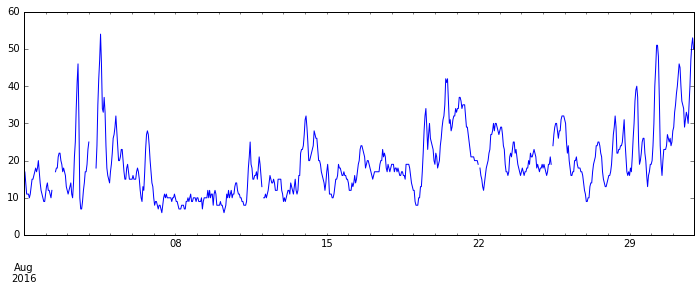

In [550]:
pm25_aug[u'上海'.encode('utf-8')].plot(figsize=(12,4));

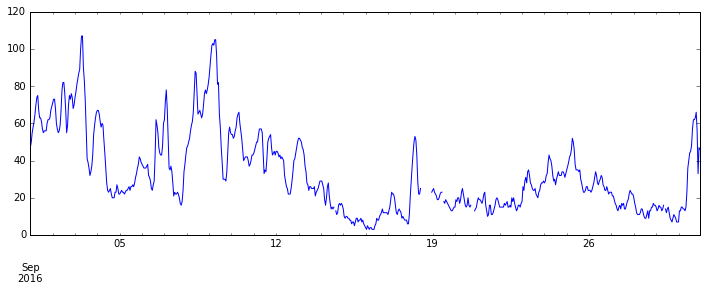

In [551]:
pm25_sep[u'上海'.encode('utf-8')].plot(figsize=(12,4));

准备对上海的pm2.5数据进行分析，根据上面排序后的结果以及上图来可以看出：
1. 8月份缺失的时间点比较分散，可近似采用上一时刻的数据来填补。
2. 9月18号缺失数据非常严重，采用上一时刻的数据来补充的话误差很大，不过用来验证预测的数据足够了，毕竟前三天的数据还是比较完整的。

In [552]:
#填补缺失的数据
pm25_aug = pm25_aug.fillna(method='pad')
pm25_sep = pm25_sep.fillna(method='pad')

#pm25_aug[u'上海'.encode('utf-8')].sort_values()[-20:]

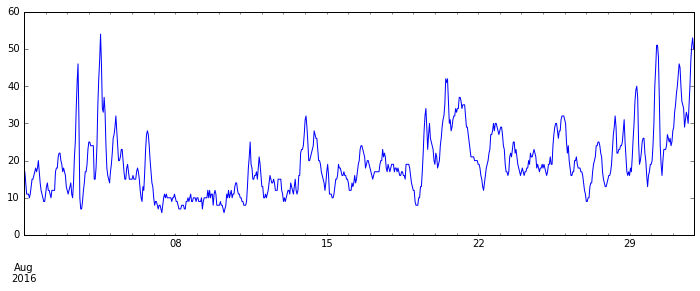

In [553]:
pm25_aug[u'上海'.encode('utf-8')].plot(figsize=(12,4));

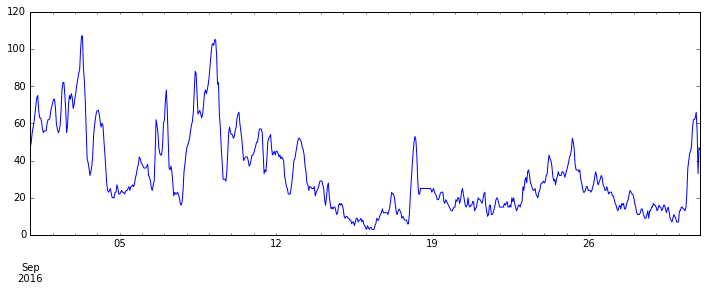

In [554]:
pm25_sep[u'上海'.encode('utf-8')].plot(figsize=(12,4));

In [555]:
len(pm25_aug),len(pm25_sep)

(744, 720)

可以看出来，现在数据完整了，不过columns的名称为中文，不方便处理，因此需增加一列。

In [558]:
pm25_aug['shanghai'] = pm25_aug[u'上海'.encode('utf-8')]
pm25_sep['shanghai'] = pm25_sep[u'上海'.encode('utf-8')]

数据读取和处理的工作基本完成，下面可以开始对数据进行分析和处理了。

先用smg.tsa模块提供的plot_acf绘图函数来观察pm2.5数据在时间序列上的autocorrelation情形。

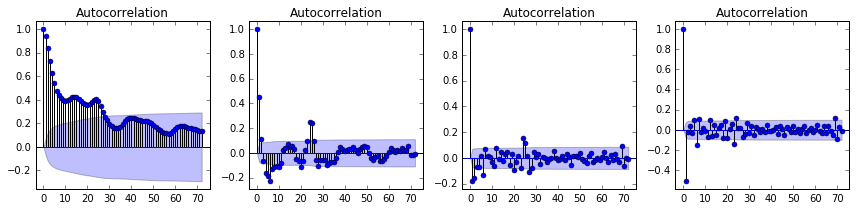

In [561]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
smg.tsa.plot_acf(pm25_aug.shanghai, lags=72, ax=axes[0])
smg.tsa.plot_acf(pm25_aug.shanghai.diff().dropna(), lags=72, ax=axes[1])
smg.tsa.plot_acf(pm25_aug.shanghai.diff().diff().dropna(), lags=72, ax=axes[2])
smg.tsa.plot_acf(pm25_aug.shanghai.diff().diff().diff().dropna(), lags=72, ax=axes[3])
fig.tight_layout()

从上图可以看出，仅仅最左边的图形所展示出来的autocorrelation效果最为明显，高阶的时间序列值所呈现的autocorrelation效果逐步减弱

In [562]:
model = sm.tsa.AR(pm25_aug.shanghai)
result = model.fit(72)
sm.stats.durbin_watson(result.resid)#检测是否消除autocorrelation，结果在2附近则说明去除了。

1.9953529820474203

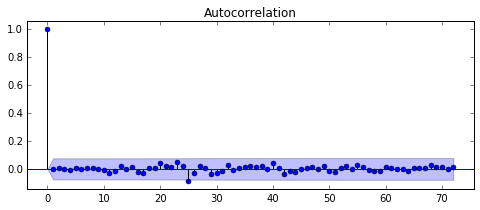

In [564]:
fig,ax = plt.subplots(1,1,figsize=(8,3))
smg.tsa.plot_acf(result.resid, lags=72, ax=ax);

Durbin-Watson statistical test的结果为1.995352，很接近2，从上图也可以看出，autocorrelation基本不存在，说明选用的模型拟合数据效果不错。

下面尝试用这个模型来预测未来3天的pm2.5数据

In [565]:
pm25_3d_forecast = result.predict("2016-09-01","2016-09-04")

//anaconda/lib/python2.7/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


下面绘制图形来观察预测数据准确度如何。

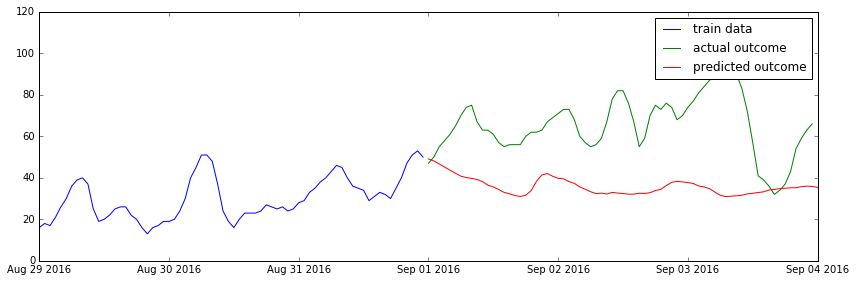

In [570]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(pm25_aug.index.values[-72:], pm25_aug.shanghai.values[-72:], label="train data")
ax.plot(pm25_sep.index.values[:72], pm25_sep.shanghai.values[:72], label="actual outcome")
ax.plot(pd.date_range("2016-09-01", "2016-09-04", freq="H").values,
        result.predict("2016-09-01", "2016-09-04"), label="predicted outcome")

ax.legend()
fig.tight_layout()

从图形可以看出，预测结果极差，说明采用这个模型来预测pm2.5数据不佳，当然，也可能是模型参数选择不好。